In [1]:
%config InlineBackend.figure_format='retina'

import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import matplotlib.image as mpimg

In [2]:
def findMiss(I_array:np.ndarray, qrange:slice, threshold:float):
    miss = (
        np.nanmean(I_array[:,qrange],axis=1)>1) &\
        (np.nanmean(I_array[:,qrange],axis=1)<threshold)&\
        (np.nanmean(I_array[:,:],axis=1)!=0
    )
    return miss
def findHits(I_array:np.ndarray, qrange:slice, threshold:float):
    hits = (
        (np.nanmean(I_array[:,qrange],axis=1)<=100) &\
        (np.nanmean(I_array[:,qrange],axis=1)>threshold)
    )
    return hits
def findIce(I_array:np.ndarray, qrange:slice):
    ice = (np.nanmean(I_array[:,qrange],axis=1)>=100)
    return ice

In [3]:
bg_run_numbers = [str(i) for i in [*range(234103,234107),234114,234118,234122,234128,234144]]
run_numbers_38mm = ["234096","234109","234110","234134"]
run_numbers_38mm_ns = ["234134"]
run_numbers_49mm = ["234112","234113"]
run_numbers_49mm_ns = ["234140"]
run_numbers_59mm = ["234116","234117"]
run_numbers_59mm_ns = ["234141"]
run_numbers_69mm = ["234120"]
run_numbers_69mm_ns = ["234142"]
run_numbers_79mm = ["234124","234125"]
run_numbers_79mm_ns = ["234143"]
run_numbers_89mm = ["234126"]
run_numbers_89mm_ns = ["234145"]
run_numbers_104mm = ["234147","234148"]
run_numbers_119mm = ["234149"]

In [4]:
# == parameters ==
# run_numbers = ["234095", "234096"]
raw_data_dir = "/xustrg0/2025A8039/"
processed_data_dir = "/UserData/andronis/test_data/processed"
# mask_path = "/home/seoyoung/2025_05_SACLA/results/avg_img/run232536_avg_img_mask.npy"
# mask = np.load(mask_path)

# == Load data == 
I_mean_q_bg = []
for run_number in bg_run_numbers:
    file_path = processed_data_dir + f"/Iq_{run_number}_combined.h5"  
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Combined file not found at: {file_path}")
    # == Load data == 
    file_path = processed_data_dir + f"/Iq_{run_number}_combined.h5"  
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Combined file not found at: {file_path}")

    with h5py.File(file_path, "r") as f:
        I = f["I"][:]
        I[I==0] = np.nan
        q = f["q"][:]
        phi = f["phi"][:]
        image_ids = f["image_id"][:]
        # print("=== Run Metadata ===")
        # for key in ["run", "shots", "images", "start_tag", "stop_tag"]:
        #     if key in f:
        #         print(f"{key}: {f[key][()]}")  # f[key][()] loads the scalar value
        #     else:
        #         print(f"{key}: Not found")

    print(f"I shape: {I.shape}")
    print(f"q shape: {q.shape}, phi shape: {phi.shape}")

    # Mean I(q) over all shots and phi
    # I = np.asanyarray(Iqs)
    I_mean_q_bg.append(np.nanmean(I, axis=(0,1)))
I_mean_q_bg = np.nanmean(I_mean_q_bg, axis=0)

I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)
I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)
I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)
I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)
I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)
I shape: (2999, 36, 250)
q shape: (250,), phi shape: (36,)
I shape: (2999, 36, 250)
q shape: (250,), phi shape: (36,)
I shape: (2999, 36, 250)
q shape: (250,), phi shape: (36,)
I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)


In [5]:
# plt.figure(figsize=(4, 3))
run_numbers = [
    run_numbers_38mm_ns, 
    run_numbers_49mm_ns,
    run_numbers_59mm_ns,
    run_numbers_69mm_ns,
    run_numbers_79mm_ns,
    run_numbers_89mm_ns,
]
distances = [38, 49, 59, 69, 79, 89]
Is = []
I_mean_qs = []
I_mean_phis = []
for r, d in zip(run_numbers, distances):
    for run_number in r:
        file_path = processed_data_dir + f"/Iq_{run_number}_combined.h5"  
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"Combined file not found at: {file_path}")
        # == Load data == 
        file_path = processed_data_dir + f"/Iq_{run_number}_combined.h5"  
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"Combined file not found at: {file_path}")

        with h5py.File(file_path, "r") as f:
            I = f["I"][:]
            I[I==0] = np.nan
            q = f["q"][:]
            phi = f["phi"][:]
            image_ids = f["image_id"][:]
            Is.append(np.nanmean(I, axis=1))
            # print("=== Run Metadata ===")
            # for key in ["run", "shots", "images", "start_tag", "stop_tag"]:
            #     if key in f:
            #         print(f"{key}: {f[key][()]}")  # f[key][()] loads the scalar value
            #     else:
            #         print(f"{key}: Not found")
        
        print(f"Distance: {d}")
        print(f"I shape: {I.shape}")
        print(f"q shape: {q.shape}, phi shape: {phi.shape}")

        # Mean I(q) over all shots and phi
        # I = np.asanyarray(Iqs)
#         I_mean_q = np.nanmean(I, axis=(0,1)) - I_mean_q_bg
#         I_mean_q /= I_mean_q.sum()
#         I_mean_qs.append(I_mean_q)

#         # Mean I(phi) over all shots and q
#         I_mean_phi = np.nanmean(I, axis=(0, 2))
#         I_mean_phis.append(I_mean_phi)
Is = np.asarray(Is)

Distance: 38
I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)
Distance: 49
I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)
Distance: 59
I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)
Distance: 69
I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)
Distance: 79
I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)
Distance: 89
I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)


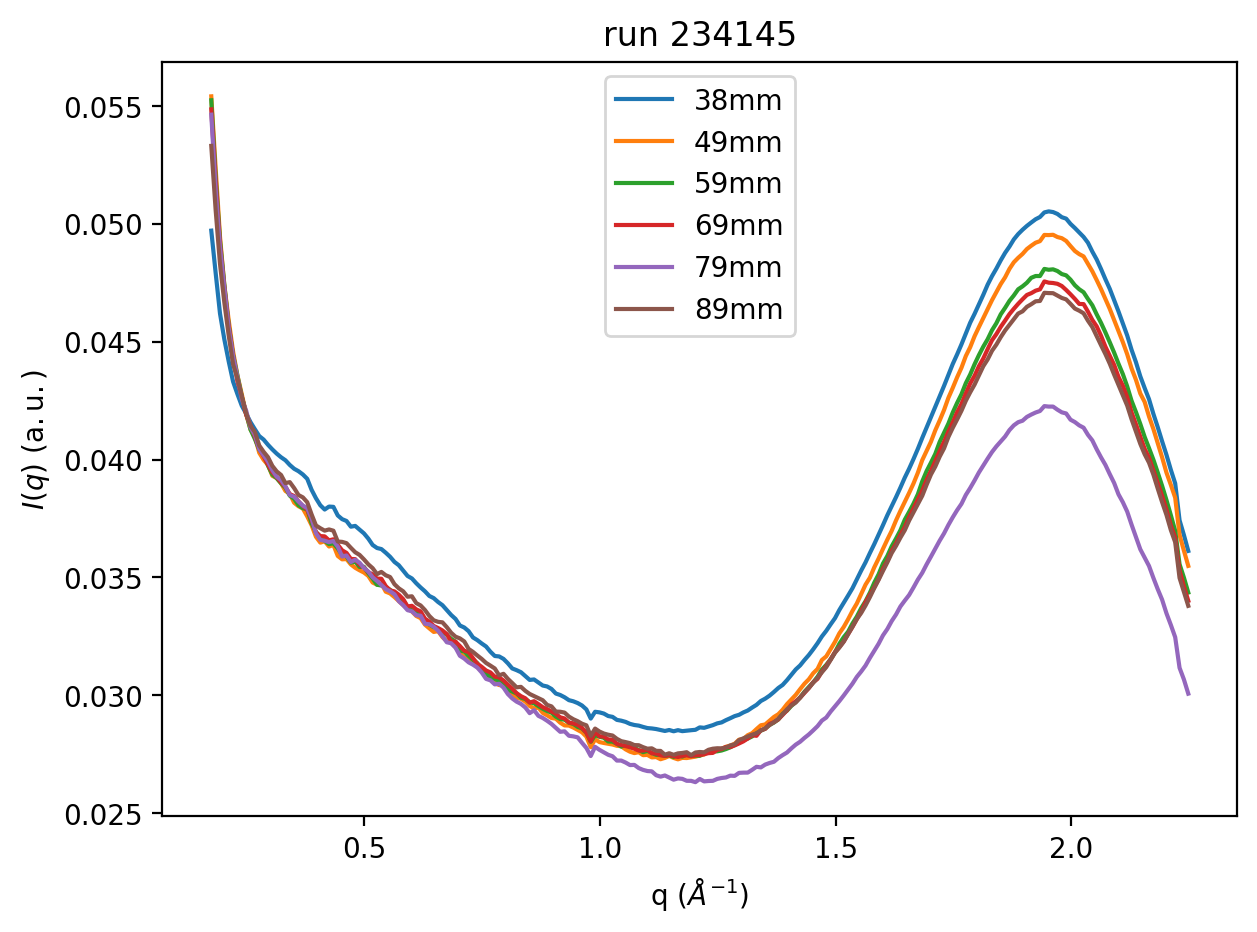

In [6]:
for i, d in zip(Is, distances):
    thrs = 15
    qr = slice(150,210)
    misses = findMiss(i, qr, thrs)
    hits = findHits(i, qr, thrs)
    ice = findIce(i, qr)
    # iq[:] /= np.expand_dims(iq[:, 10], axis=1)
    iq_plot = np.nanmean(i[hits], axis=0)[10:-15] - I_mean_q_bg[10:-15]
    iq_plot /= np.trapz(iq_plot[:25])
    plt.plot(q[10:-15], iq_plot, label=f"{d}mm")
    # plt.imshow(iq[:, 10:], aspect="auto", interpolation="none")
    # plt.title(d)
    # plt.colorbar()
    # plt.show()
# plt.plot(q[10:-15], 1.3*I_mean_q_bg[10:-15])
plt.xlabel("q ($\AA^{-1}$)")
plt.ylabel("$I(q)~\mathrm{(a.u.)}$")
plt.title(r"run %i"%(int(run_number)))
# plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("images/iqs_distances.svg")
plt.show()

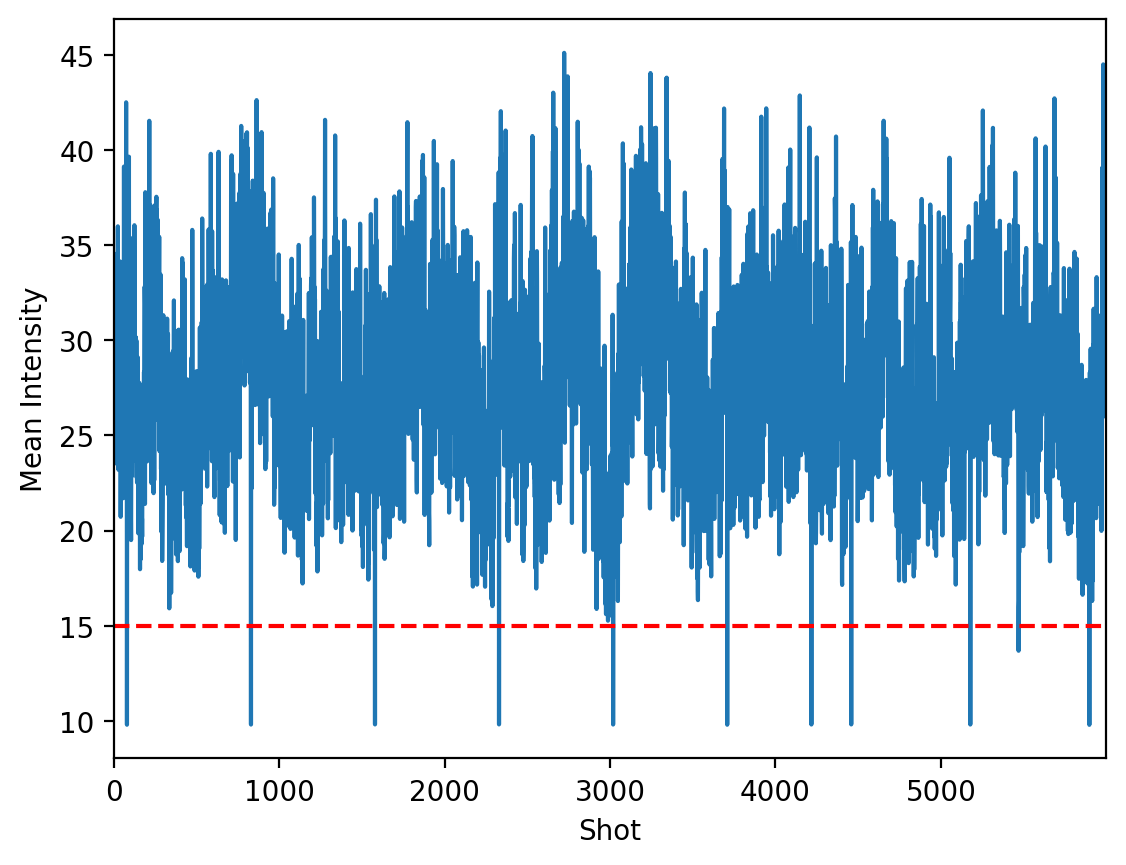

In [86]:
with h5py.File(f"/UserData/andronis/test_data/processed/converted/{run_number}.h5") as f:
    pulse_energy = f[f"run_{run_number}/event_info/bm_1_signal_in_joule"][1:]*7.5e4
nan_idxs = (~np.isnan(pulse_energy))
plt.plot(np.nanmean(Is[0][:,150:210], axis=1))
plt.xlim(0, 5999)
plt.axhline(15, c="r", ls="--")
plt.xlabel("Shot")
plt.ylabel("Mean Intensity")
plt.savefig("images/mean_intensity_water.svg")
plt.show()

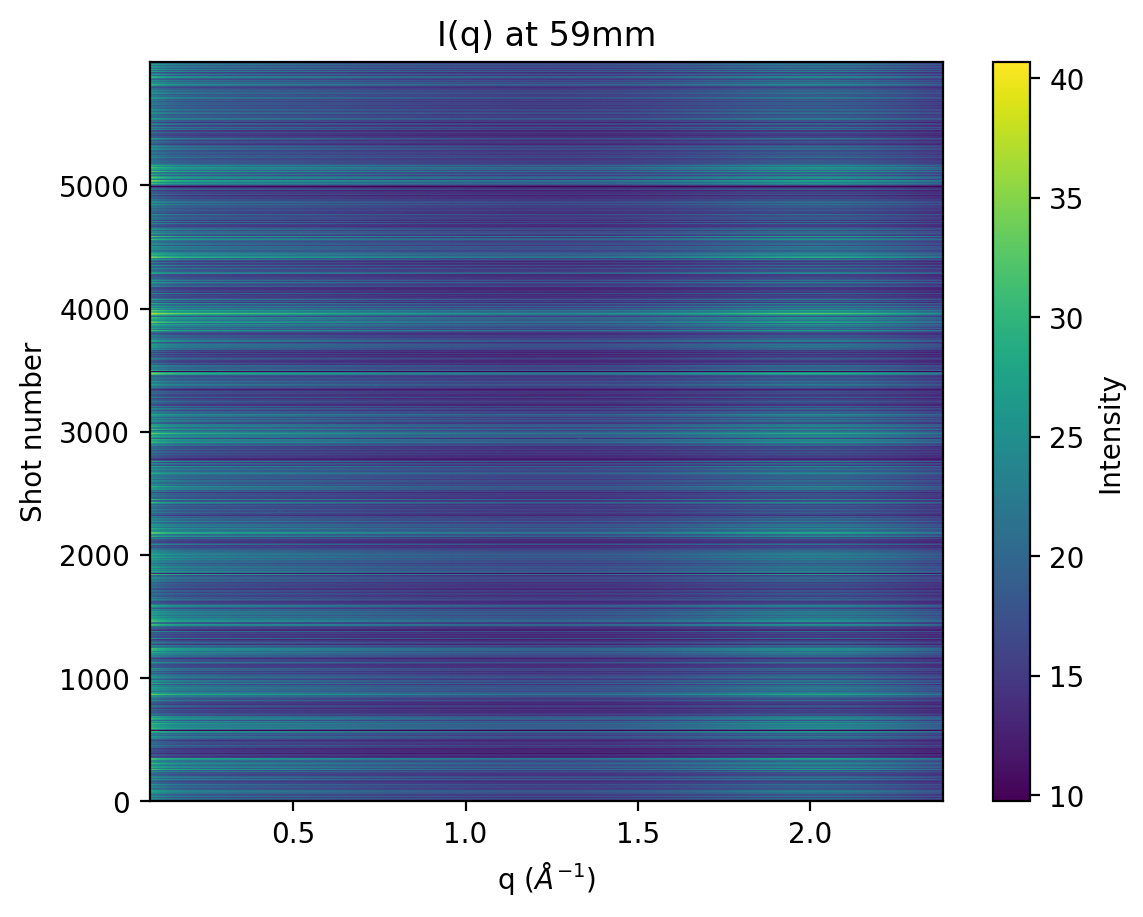

In [87]:
plt.imshow(Is[2][:, 10:-10], aspect="auto", extent=[q.min(), q.max(), 0, Is[0].shape[0]], interpolation="none")
plt.colorbar(label="Intensity")
plt.xlabel("q ($\AA^{-1}$)")
plt.ylabel("Shot number")
plt.title(f"I(q) at {distances[2]}mm")
plt.savefig("images/iq_shot_heatmap.svg")
plt.show()

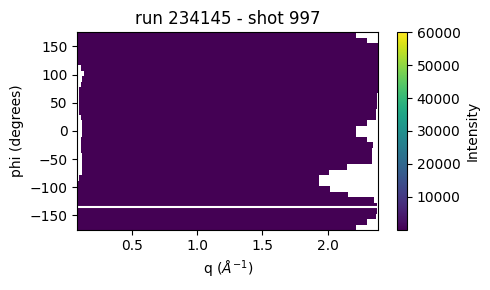

In [8]:
# == Plot I(q,phi)
shot=997
plt.figure(figsize=(5, 3))
plt.imshow(I[shot], extent=(q[0], q[-1], phi[0], phi[-1]), vmax=60000, aspect="auto", origin="lower", interpolation="none")
plt.axhline(phi[4], c="w")
plt.colorbar(label="Intensity")
plt.xlabel("q ($\AA^{-1}$)")
plt.ylabel("phi (degrees)")
plt.title(r"run %i - shot %i"%(int(run_number), shot))
plt.tight_layout()
plt.show()

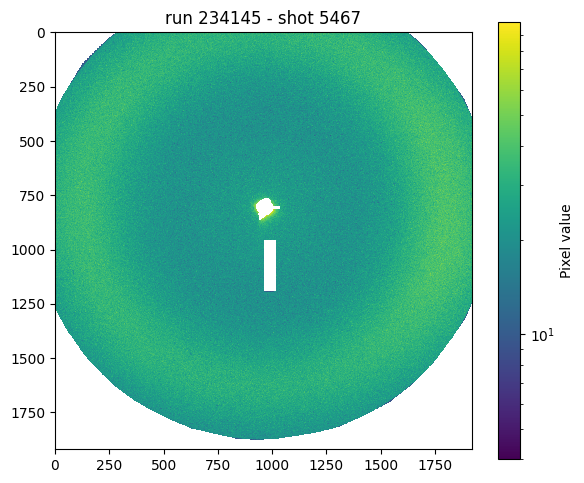

In [9]:
from matplotlib.colors import LogNorm

# == Load and plot one shot from raw data
shot=5467
raw_path = raw_data_dir+f"234143/data_{shot:06}.img"
raw_image=mpimg.imread(raw_path)
mask_path = "/home/myeongsik/mask_234110.npy"
mask = np.load(mask_path)

plt.figure(figsize=(6, 5))
plt.imshow(raw_image*(~mask.astype(bool)), norm=LogNorm(), interpolation="none")
plt.colorbar(label="Pixel value")
plt.title(r"run %i - shot %i"%(int(run_number), shot))
plt.tight_layout()
plt.show()



In [ ]:
import pyFAI

poni_file = "/home/seoyoung/2025_05_SACLA/results/avg_img/run234059_avg_img.poni"

ai = pyFAI.load(poni_file)
I, q, phi = ai.integrate2d_ng(
    raw_image, 250, 36, mask=mask,
    correctSolidAngle=False, unit="q_A^-1"
)

In [ ]:
plt.plot(q, I[1,:])